In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

## Loading the Dataset

In [2]:
#creating database connection
conn = sqlite3.connect('inventory.db')

# fetching vendor summary data
df = pd.read_sql_query("select * from vendor_sales_summary",conn)
df.head()

VendorNumber                VendorName  Brand              Description  \
0          1128         BROWN-FORMAN CORP   1233  Jack Daniels No 7 Black   
1          4425     MARTIGNETTI COMPANIES   3405    Tito's Handmade Vodka   
2         17035         PERNOD RICARD USA   8068         Absolut 80 Proof   
3          3960  DIAGEO NORTH AMERICA INC   4261   Capt Morgan Spiced Rum   
4          3960  DIAGEO NORTH AMERICA INC   3545          Ketel One Vodka   

   PurchasePrice  ActualPrice  Volume  TotalPurchaseQuantity  \
0          26.27        36.99  1750.0                 145080   
1          23.19        28.99  1750.0                 164038   
2          18.24        24.99  1750.0                 187407   
3          16.17        22.99  1750.0                 201682   
4          21.89        29.99  1750.0                 138109   

   TotalPurchaseDollars  TotalSalesQuantity  TotalSalesDollars  \
0            3811251.60            142049.0       5.101920e+06   
1            3804041.22            160247.0       4.819073e+06   
2            3418303.68            187140.0       4.538121e+06   
3            3261197.94            200412.0       4.475973e+06   
4            3023206.01            135838.0       4.223108e+06   

   TotalSalesPrice  TotalExciseTax  FreightCost  GrossProfit  ProfitMargin  \
0        672819.31       260999.20     68601.68   1290667.91     25.297693   
1        561512.37       294438.66    144929.24   1015032.27     21.062810   
2        461140.15       343854.07    123780.22   1119816.92     24.675786   
3        420050.01       368242.80    257032.07   1214774.94     27.139908   
4        545778.28       249587.83    257032.07   1199901.61     28.412764   

   StockTurnover  SalestoPurchaseRatio  
0       0.979108              1.338647  
1       0.976890              1.266830  
2       0.998575              1.327594  
3       0.993703              1.372493  
4       0.983556              1.396897

## Exploratory Data Analysis

In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns, identify anomalies, and ensure data quality before proceeding with further analysis

In [3]:
# summary statistics
df.describe()

VendorNumber         Brand  PurchasePrice   ActualPrice        Volume  \
count   10692.000000  10692.000000   10692.000000  10692.000000  10692.000000   
mean    10650.649458  18039.228769      24.385303     35.643671    847.360550   
std     18753.519148  12662.187074     109.269375    148.246016    664.309212   
min         2.000000     58.000000       0.360000      0.490000     50.000000   
25%      3951.000000   5793.500000       6.840000     10.990000    750.000000   
50%      7153.000000  18761.500000      10.455000     15.990000    750.000000   
75%      9552.000000  25514.250000      19.482500     28.990000    750.000000   
max    201359.000000  90631.000000    5681.810000   7499.990000  20000.000000   

       TotalPurchaseQuantity  TotalPurchaseDollars  TotalSalesQuantity  \
count           10692.000000          1.069200e+04        10692.000000   
mean             3140.886831          3.010669e+04         3077.482136   
std             11095.086769          1.230678e+05        10952.851391   
min                 1.000000          7.100000e-01            0.000000   
25%                36.000000          4.534575e+02           33.000000   
50%               262.000000          3.655465e+03          261.000000   
75%              1975.750000          2.073824e+04         1929.250000   
max            337660.000000          3.811252e+06       334939.000000   

       TotalSalesDollars  TotalSalesPrice  TotalExciseTax    FreightCost  \
count       1.069200e+04     10692.000000    10692.000000   10692.000000   
mean        4.223907e+04     18793.783627     1774.226259   61433.763214   
std         1.676553e+05     44952.773386    10975.582240   60938.458032   
min         0.000000e+00         0.000000        0.000000       0.090000   
25%         7.292200e+02       289.710000        4.800000   14069.870000   
50%         5.298045e+03      2857.800000       46.570000   50293.620000   
75%         2.839692e+04     16059.562500      418.650000   79528.990000   
max         5.101920e+06    672819.310000   368242.800000  257032.070000   

        GrossProfit  ProfitMargin  StockTurnover  SalestoPurchaseRatio  
count  1.069200e+04  1.069200e+04   10692.000000          10692.000000  
mean   1.213238e+04          -inf       1.706793              2.504390  
std    4.622434e+04           NaN       6.020460              8.459067  
min   -5.200278e+04          -inf       0.000000              0.000000  
25%    5.292000e+01  1.332451e+01       0.807229              1.153729  
50%    1.399640e+03  3.040546e+01       0.981529              1.436894  
75%    8.660200e+03  3.995613e+01       1.039342              1.665449  
max    1.290668e+06  9.971666e+01     274.500000            352.928571

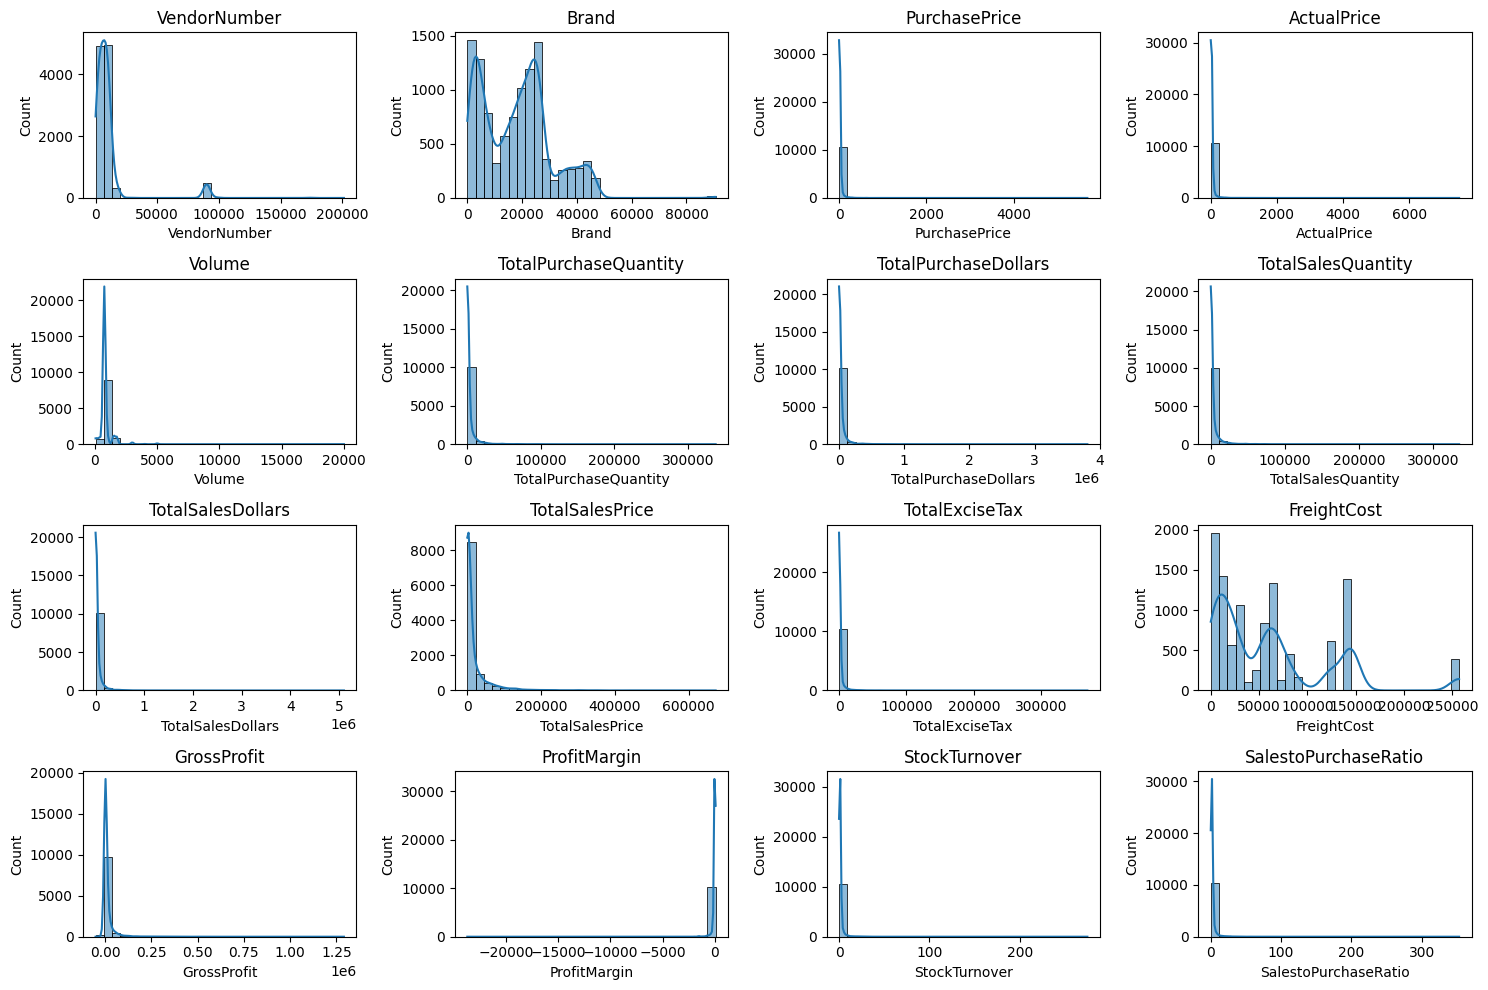

In [4]:
# Distribution plot for numerical columns
numerical_col = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))

for i, col in enumerate(numerical_col):
    plt.subplot(4,4,i+1) # adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
    
plt.tight_layout()
plt.show()

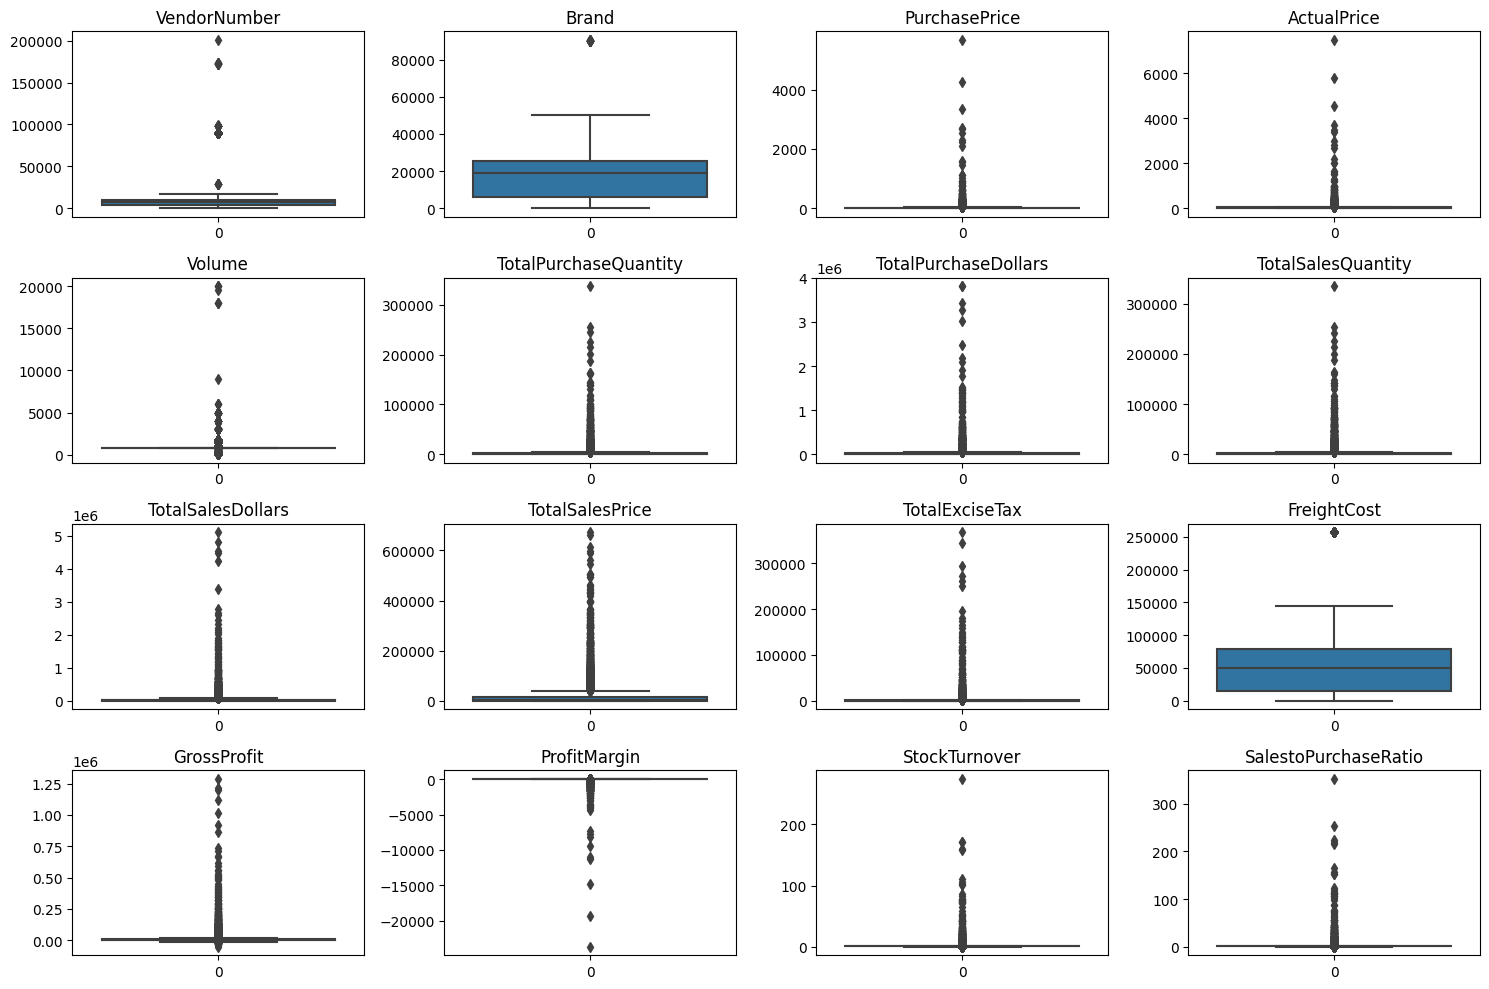

In [5]:
# Outliers detection
# Distribution plot for numerical columns
numerical_col = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))

for i, col in enumerate(numerical_col):
    plt.subplot(4,4,i+1) # adjust grid layout as needed
    sns.boxplot(df[col])
    plt.title(col)
    
plt.tight_layout()
plt.show()

There are outliers present but we cannot simply remove them as that may be of some premium brands as well so we will filter out the data without any inconsistency

In [6]:
df = pd.read_sql_query("""Select *
from vendor_sales_summary
where GrossProfit>0 and ProfitMargin>0 and TotalSalesQuantity>0""",conn)
df.head()

VendorNumber                VendorName  Brand              Description  \
0          1128         BROWN-FORMAN CORP   1233  Jack Daniels No 7 Black   
1          4425     MARTIGNETTI COMPANIES   3405    Tito's Handmade Vodka   
2         17035         PERNOD RICARD USA   8068         Absolut 80 Proof   
3          3960  DIAGEO NORTH AMERICA INC   4261   Capt Morgan Spiced Rum   
4          3960  DIAGEO NORTH AMERICA INC   3545          Ketel One Vodka   

   PurchasePrice  ActualPrice  Volume  TotalPurchaseQuantity  \
0          26.27        36.99  1750.0                 145080   
1          23.19        28.99  1750.0                 164038   
2          18.24        24.99  1750.0                 187407   
3          16.17        22.99  1750.0                 201682   
4          21.89        29.99  1750.0                 138109   

   TotalPurchaseDollars  TotalSalesQuantity  TotalSalesDollars  \
0            3811251.60            142049.0       5.101920e+06   
1            3804041.22            160247.0       4.819073e+06   
2            3418303.68            187140.0       4.538121e+06   
3            3261197.94            200412.0       4.475973e+06   
4            3023206.01            135838.0       4.223108e+06   

   TotalSalesPrice  TotalExciseTax  FreightCost  GrossProfit  ProfitMargin  \
0        672819.31       260999.20     68601.68   1290667.91     25.297693   
1        561512.37       294438.66    144929.24   1015032.27     21.062810   
2        461140.15       343854.07    123780.22   1119816.92     24.675786   
3        420050.01       368242.80    257032.07   1214774.94     27.139908   
4        545778.28       249587.83    257032.07   1199901.61     28.412764   

   StockTurnover  SalestoPurchaseRatio  
0       0.979108              1.338647  
1       0.976890              1.266830  
2       0.998575              1.327594  
3       0.993703              1.372493  
4       0.983556              1.396897

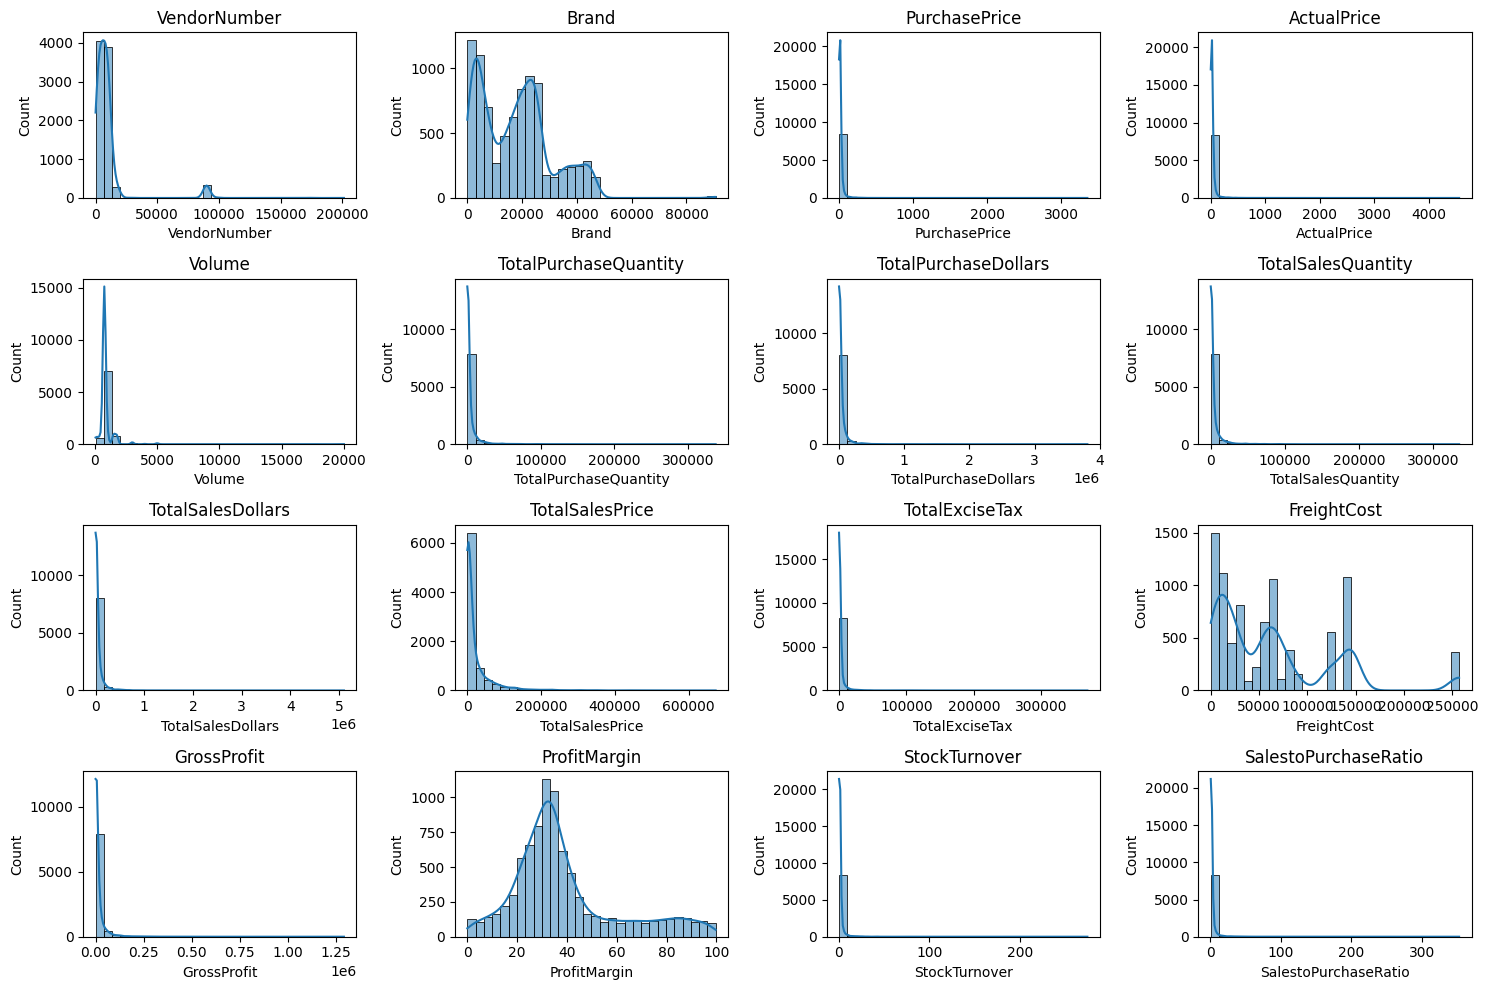

In [7]:
# Distribution plot for numerical columns
numerical_col = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))

for i, col in enumerate(numerical_col):
    plt.subplot(4,4,i+1) # adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
    
plt.tight_layout()
plt.show()

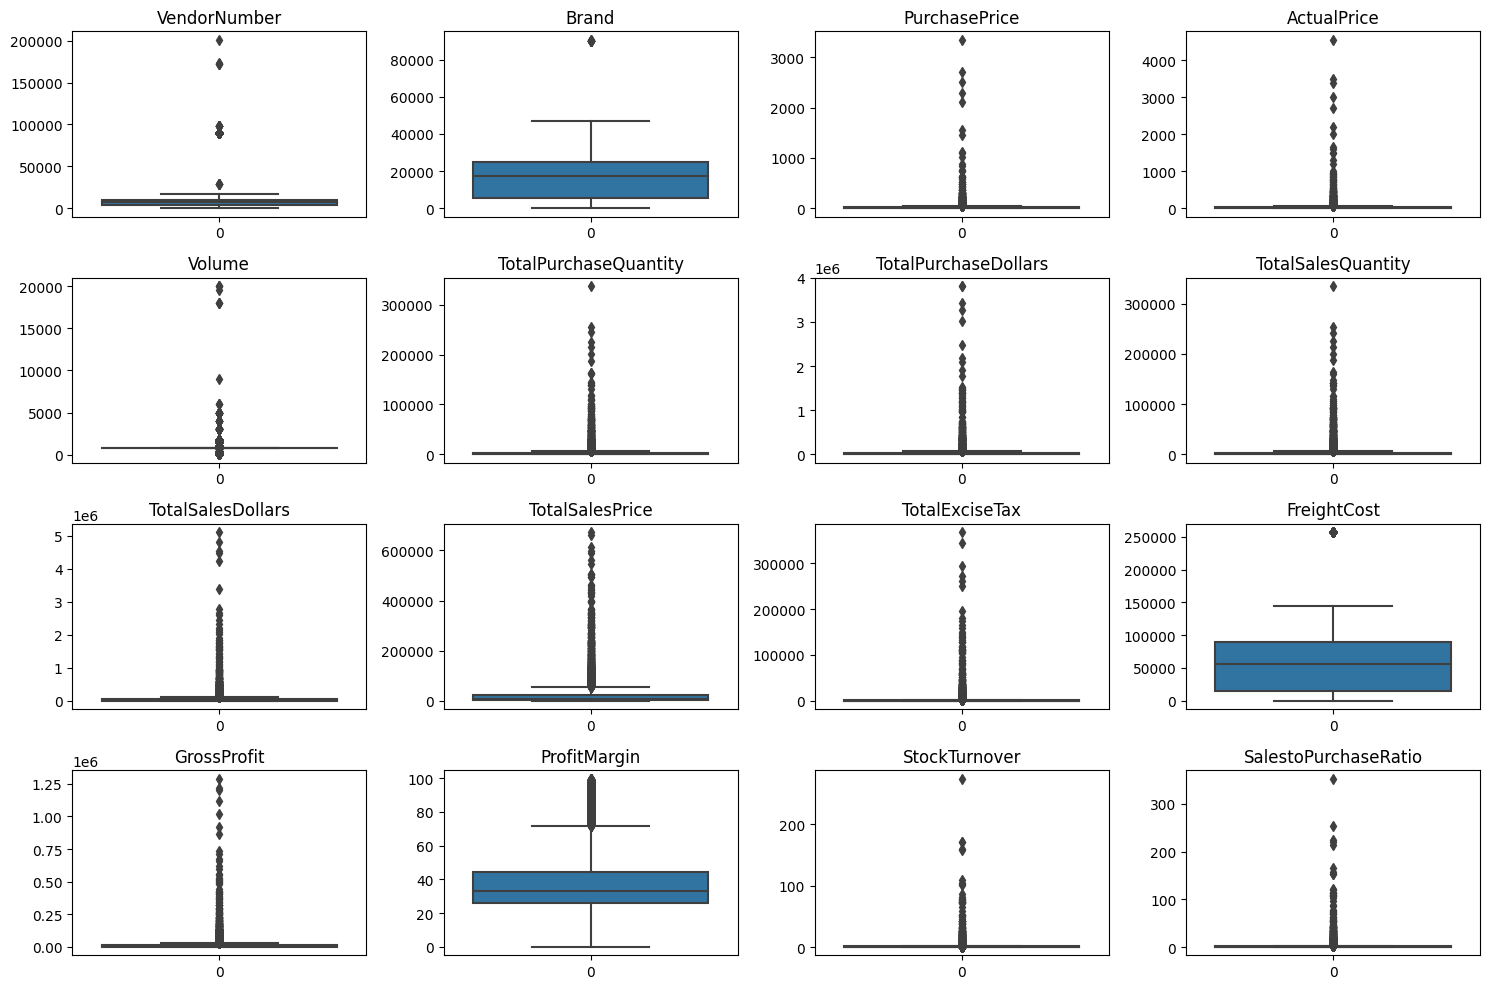

In [8]:
# Outliers detection
# Distribution plot for numerical columns
numerical_col = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))

for i, col in enumerate(numerical_col):
    plt.subplot(4,4,i+1) # adjust grid layout as needed
    sns.boxplot(df[col])
    plt.title(col)
    
plt.tight_layout()
plt.show()

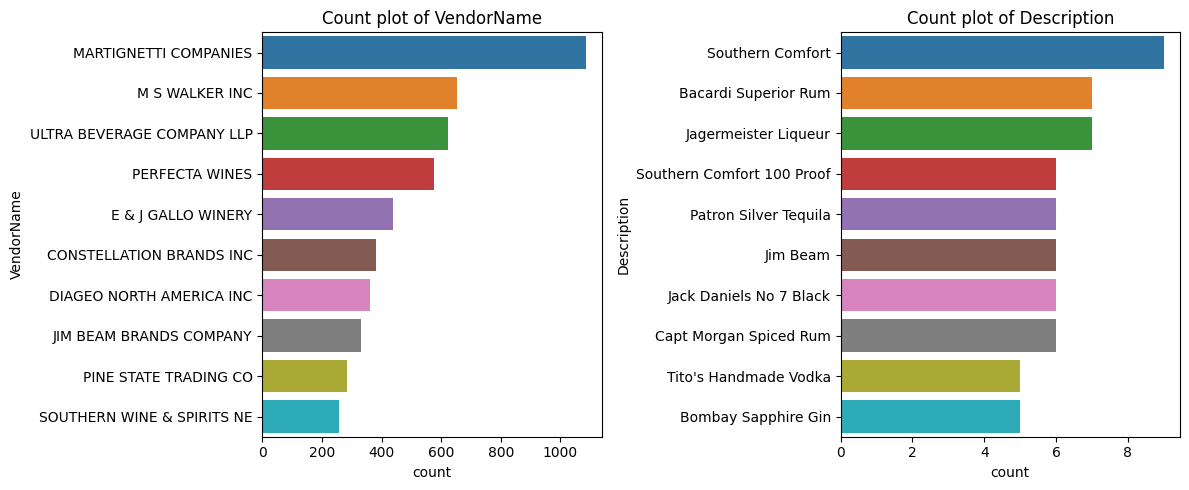

In [9]:
# count plots for Categorical Columns
categorical_cols = ["VendorName","Description"]

plt.figure(figsize=(12,5))
for i,col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10]) # top 10 categories
    plt.title(f"Count plot of {col}")
    
plt.tight_layout()
plt.show()

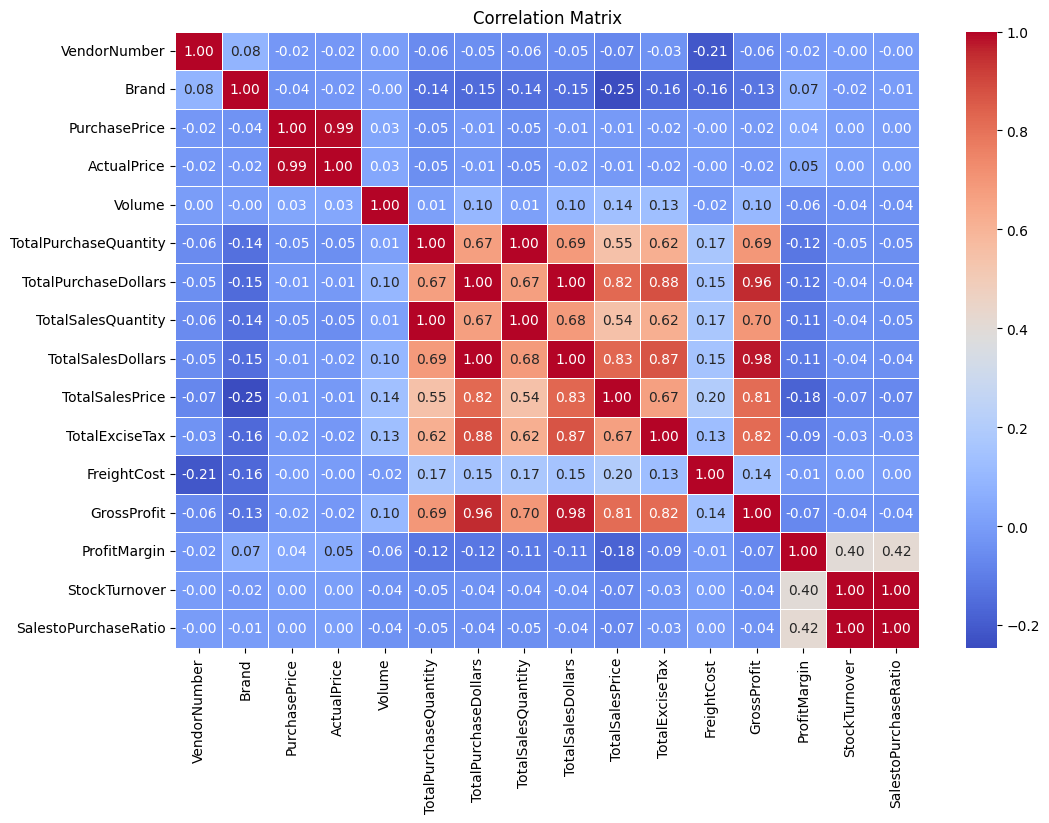

In [10]:
# Correlation Matrix
plt.figure(figsize=(12,8))
correlation_matrix = df[numerical_col].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

### Correlation Insights

1. PurchasePrice has week correlation with TotalSalesDollars and GrossProfit
2. Strong correlation between total purchase quantity and total sales quantity
3. Negative Correlation between profiit margin and total sales price--> sales price inc then margins dec due to competition  
4. StockTurnover has weak negative correlation with both GrossProfit and ProfitMargin, indicating faster turnover doesnt result in higher profit

# Data Analysis

<b>1. Identify Brands that needs Promotional Pricing Adjustments which exhibit lower sales performance but higher profit margins</b>

In [13]:
brand_performance_data = df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin': 'mean'
}).reset_index()

In [14]:
low_sales_threshold=brand_performance_data['TotalSalesDollars'].quantile(0.15)
high_profit_threshold = brand_performance_data['ProfitMargin'].quantile(0.85)

In [15]:
low_sales_threshold

560.299

In [16]:
high_profit_threshold

64.97017552750111

In [18]:
# target the brands
target_brands = brand_performance_data[
    (brand_performance_data['TotalSalesDollars']<=low_sales_threshold) &
    (brand_performance_data['ProfitMargin'] >= high_profit_threshold)
]
print("Brands with low sales and high profit margins: ")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with low sales and high profit margins: 


Description  TotalSalesDollars  ProfitMargin
6199    Santa Rita Organic Svgn Bl               9.99     66.466466
2369             Debauchery Pnt Nr              11.58     65.975820
2070   Concannon Glen Ellen Wh Zin              15.95     83.448276
2188             Crown Royal Apple              27.86     89.806174
6237  Sauza Sprklg Wild Berry Marg              27.96     82.153076
...                            ...                ...           ...
5074   Nanbu Bijin Southern Beauty             535.68     76.747312
2271         Dad's Hat Rye Whiskey             538.89     81.851584
57       A Bichot Clos Marechaudes             539.94     67.740860
6245     Sbragia Home Ranch Merlot             549.75     66.444748
3326     Goulee Cos d'Estournel 10             558.87     69.434752

[198 rows x 3 columns]

<b>2. Which vendors an brands demonstrates the highest sales performance?</b>

In [22]:
def format_dollars(value):
    if(value>=1_000_000):
        return f"{value/1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value/1_000:.2f}K"
    else:
        return str(value)

In [24]:
# Top vendors and Brands by Sales Performance
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")['TotalSalesDollars'].sum().nlargest(10)
top_vendors.apply(lambda x: format_dollars(x))

VendorName
DIAGEO NORTH AMERICA INC      67.99M
MARTIGNETTI COMPANIES         39.33M
PERNOD RICARD USA             32.06M
JIM BEAM BRANDS COMPANY       31.42M
BACARDI USA INC               24.85M
CONSTELLATION BRANDS INC      24.22M
E & J GALLO WINERY            18.40M
BROWN-FORMAN CORP             18.25M
ULTRA BEVERAGE COMPANY LLP    16.50M
M S WALKER INC                14.71M
Name: TotalSalesDollars, dtype: object

In [23]:
top_brands.apply(lambda x: format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

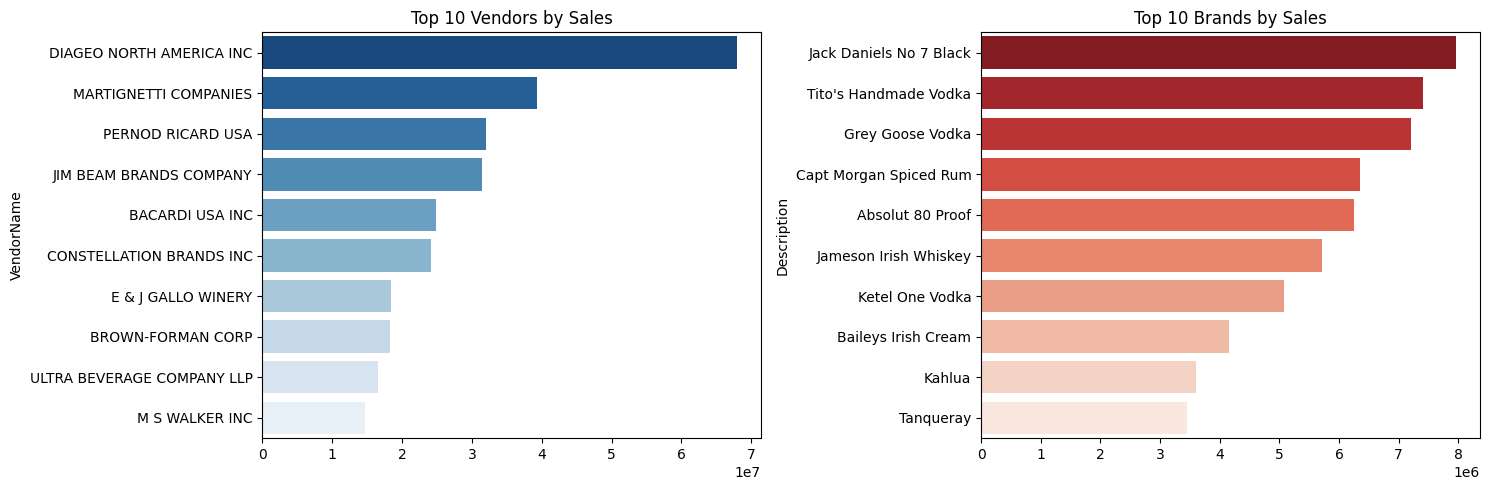

In [25]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ax1 = sns.barplot(y=top_vendors.index, x = top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

plt.subplot(1,2,2)
ax2 = sns.barplot(y=top_brands.index, x = top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

plt.tight_layout()
plt.show()

<b>3. Which vendors contributes the most to total purchase dollars?</b>

In [27]:
vendor_performance=df.groupby('VendorName').aggregate({
    'TotalPurchaseDollars': 'sum',
    'GrossProfit': 'sum',
    'TotalSalesDollars': 'sum'
}).reset_index()

In [28]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()

In [43]:
vendor_performance=round(vendor_performance.sort_values('PurchaseContribution%',ascending=False),2)*100

In [44]:
top_vendors = vendor_performance.head(10)
top_vendors['TotalPurchaseDollars']=top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors['TotalSalesDollars']=top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors

VendorName TotalPurchaseDollars  \
25   DIAGEO NORTH AMERICA INCDIAGEO NORTH AMERICA I...             5009.72M   
68   PERNOD RICARD USAPERNOD RICARD USAPERNOD RICAR...             2385.12M   
46   JIM BEAM BRANDS COMPANYJIM BEAM BRANDS COMPANY...             2349.43M   
57   MARTIGNETTI COMPANIESMARTIGNETTI COMPANIESMART...             2550.21M   
6    BACARDI USA INCBACARDI USA INCBACARDI USA INCB...             1743.20M   
20   CONSTELLATION BRANDS INCCONSTELLATION BRANDS I...             1527.37M   
11   BROWN-FORMAN CORPBROWN-FORMAN CORPBROWN-FORMAN...             1323.89M   
30   E & J GALLO WINERYE & J GALLO WINERYE & J GALL...             1206.85M   
106  ULTRA BEVERAGE COMPANY LLPULTRA BEVERAGE COMPA...             1116.71M   
53   M S WALKER INCM S WALKER INCM S WALKER INCM S ...              976.43M   

    GrossProfit TotalSalesDollars  PurchaseContribution%  
25     1789.29M          6799.01M                   16.0  
68      821.20M          3206.32M                    8.0  
46      792.87M          3142.30M                    8.0  
57     1382.83M          3933.04M                    8.0  
6       742.28M          2485.48M                    6.0  
20      894.50M          2421.87M                    5.0  
11      500.83M          1824.72M                    4.0  
30      633.14M          1839.99M                    4.0  
106     533.55M          1650.25M                    4.0  
53      494.21M          1470.65M                    3.0

In [47]:
top_vendors['Cumulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum()

In [48]:
top_vendors

VendorName TotalPurchaseDollars  \
25   DIAGEO NORTH AMERICA INCDIAGEO NORTH AMERICA I...             5009.72M   
68   PERNOD RICARD USAPERNOD RICARD USAPERNOD RICAR...             2385.12M   
46   JIM BEAM BRANDS COMPANYJIM BEAM BRANDS COMPANY...             2349.43M   
57   MARTIGNETTI COMPANIESMARTIGNETTI COMPANIESMART...             2550.21M   
6    BACARDI USA INCBACARDI USA INCBACARDI USA INCB...             1743.20M   
20   CONSTELLATION BRANDS INCCONSTELLATION BRANDS I...             1527.37M   
11   BROWN-FORMAN CORPBROWN-FORMAN CORPBROWN-FORMAN...             1323.89M   
30   E & J GALLO WINERYE & J GALLO WINERYE & J GALL...             1206.85M   
106  ULTRA BEVERAGE COMPANY LLPULTRA BEVERAGE COMPA...             1116.71M   
53   M S WALKER INCM S WALKER INCM S WALKER INCM S ...              976.43M   

    GrossProfit TotalSalesDollars  PurchaseContribution%  \
25     1789.29M          6799.01M                   16.0   
68      821.20M          3206.32M                    8.0   
46      792.87M          3142.30M                    8.0   
57     1382.83M          3933.04M                    8.0   
6       742.28M          2485.48M                    6.0   
20      894.50M          2421.87M                    5.0   
11      500.83M          1824.72M                    4.0   
30      633.14M          1839.99M                    4.0   
106     533.55M          1650.25M                    4.0   
53      494.21M          1470.65M                    3.0   

     Cumulative_Contribution%  
25                       16.0  
68                       24.0  
46                       32.0  
57                       40.0  
6                        46.0  
20                       51.0  
11                       55.0  
30                       59.0  
106                      63.0  
53                       66.0

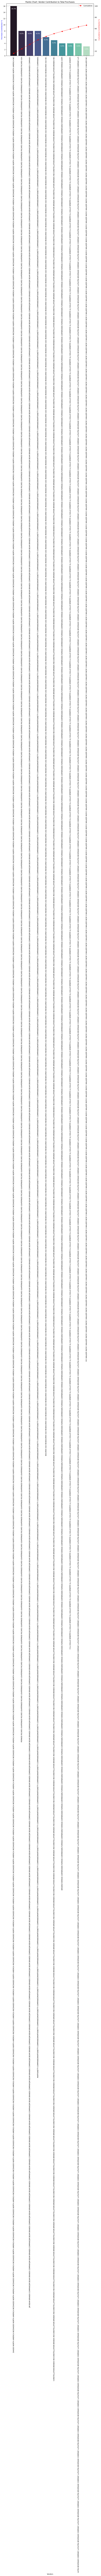

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax1 = plt.subplots(figsize=(10,6))  # fixed subplot creation

sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution%'], palette="mako", ax=ax1)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value-1, str(value)+'%', ha='center', fontsize=10, color='white')  # fixed text placement

ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], color='red', marker='o', linestyle='dashed', label='Cumulative')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)  # fixed function name
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


<b>4. Does Purchasing in Bulk reduce the unit price, and what is the optimal purchase volume for cost savings?</b>

In [55]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']
df.head(10)

VendorNumber                VendorName  Brand              Description  \
0          1128         BROWN-FORMAN CORP   1233  Jack Daniels No 7 Black   
1          4425     MARTIGNETTI COMPANIES   3405    Tito's Handmade Vodka   
2         17035         PERNOD RICARD USA   8068         Absolut 80 Proof   
3          3960  DIAGEO NORTH AMERICA INC   4261   Capt Morgan Spiced Rum   
4          3960  DIAGEO NORTH AMERICA INC   3545          Ketel One Vodka   
5           480           BACARDI USA INC   3858         Grey Goose Vodka   
6         17035         PERNOD RICARD USA   2589    Jameson Irish Whiskey   
7          3960  DIAGEO NORTH AMERICA INC   3102        Smirnoff Traveler   
8          3960  DIAGEO NORTH AMERICA INC   3489                Tanqueray   
9         12546   JIM BEAM BRANDS COMPANY   1376                 Jim Beam   

   PurchasePrice  ActualPrice  Volume  TotalPurchaseQuantity  \
0          26.27        36.99  1750.0                 145080   
1          23.19        28.99  1750.0                 164038   
2          18.24        24.99  1750.0                 187407   
3          16.17        22.99  1750.0                 201682   
4          21.89        29.99  1750.0                 138109   
5          17.77        23.99   750.0                 138809   
6          30.76        39.99  1750.0                  70783   
7          12.94        17.99  1750.0                 161386   
8          20.73        27.99  1750.0                  91835   
9          16.29        21.99  1750.0                 108866   

   TotalPurchaseDollars  TotalSalesQuantity  TotalSalesDollars  \
0            3811251.60            142049.0       5.101920e+06   
1            3804041.22            160247.0       4.819073e+06   
2            3418303.68            187140.0       4.538121e+06   
3            3261197.94            200412.0       4.475973e+06   
4            3023206.01            135838.0       4.223108e+06   
5            2466635.93            141860.0       3.383912e+06   
6            2177285.08             69627.0       2.773368e+06   
7            2088334.84            148265.0       2.592041e+06   
8            1903739.55             90481.0       2.640491e+06   
9            1773427.14            107061.0       2.435393e+06   

   TotalSalesPrice  TotalExciseTax  FreightCost  GrossProfit  ProfitMargin  \
0        672819.31       260999.20     68601.68   1290667.91     25.297693   
1        561512.37       294438.66    144929.24   1015032.27     21.062810   
2        461140.15       343854.07    123780.22   1119816.92     24.675786   
3        420050.01       368242.80    257032.07   1214774.94     27.139908   
4        545778.28       249587.83    257032.07   1199901.61     28.412764   
5        446932.09       111699.19     89286.27    917276.47     27.106980   
6        614529.34       127931.67    123780.22    596082.65     21.493098   
7        292586.29       272422.60    257032.07    503706.51     19.432812   
8        503661.02       166244.44    257032.07    736751.64     27.902068   
9        426902.78       196707.35    123880.97    661966.25     27.181081   

   StockTurnover  SalestoPurchaseRatio  UnitPurchasePrice  
0       0.979108              1.338647              26.27  
1       0.976890              1.266830              23.19  
2       0.998575              1.327594              18.24  
3       0.993703              1.372493              16.17  
4       0.983556              1.396897              21.89  
5       1.021980              1.371873              17.77  
6       0.983668              1.273773              30.76  
7       0.918698              1.241200              12.94  
8       0.985256              1.387002              20.73  
9       0.983420              1.373269              16.29

In [56]:
df['OrderSize'] = pd.qcut(df['TotalPurchaseQuantity'], q=3, labels=['Small','Medium','Large'])

In [57]:
df.head(10)

VendorNumber                VendorName  Brand              Description  \
0          1128         BROWN-FORMAN CORP   1233  Jack Daniels No 7 Black   
1          4425     MARTIGNETTI COMPANIES   3405    Tito's Handmade Vodka   
2         17035         PERNOD RICARD USA   8068         Absolut 80 Proof   
3          3960  DIAGEO NORTH AMERICA INC   4261   Capt Morgan Spiced Rum   
4          3960  DIAGEO NORTH AMERICA INC   3545          Ketel One Vodka   
5           480           BACARDI USA INC   3858         Grey Goose Vodka   
6         17035         PERNOD RICARD USA   2589    Jameson Irish Whiskey   
7          3960  DIAGEO NORTH AMERICA INC   3102        Smirnoff Traveler   
8          3960  DIAGEO NORTH AMERICA INC   3489                Tanqueray   
9         12546   JIM BEAM BRANDS COMPANY   1376                 Jim Beam   

   PurchasePrice  ActualPrice  Volume  TotalPurchaseQuantity  \
0          26.27        36.99  1750.0                 145080   
1          23.19        28.99  1750.0                 164038   
2          18.24        24.99  1750.0                 187407   
3          16.17        22.99  1750.0                 201682   
4          21.89        29.99  1750.0                 138109   
5          17.77        23.99   750.0                 138809   
6          30.76        39.99  1750.0                  70783   
7          12.94        17.99  1750.0                 161386   
8          20.73        27.99  1750.0                  91835   
9          16.29        21.99  1750.0                 108866   

   TotalPurchaseDollars  TotalSalesQuantity  TotalSalesDollars  \
0            3811251.60            142049.0       5.101920e+06   
1            3804041.22            160247.0       4.819073e+06   
2            3418303.68            187140.0       4.538121e+06   
3            3261197.94            200412.0       4.475973e+06   
4            3023206.01            135838.0       4.223108e+06   
5            2466635.93            141860.0       3.383912e+06   
6            2177285.08             69627.0       2.773368e+06   
7            2088334.84            148265.0       2.592041e+06   
8            1903739.55             90481.0       2.640491e+06   
9            1773427.14            107061.0       2.435393e+06   

   TotalSalesPrice  TotalExciseTax  FreightCost  GrossProfit  ProfitMargin  \
0        672819.31       260999.20     68601.68   1290667.91     25.297693   
1        561512.37       294438.66    144929.24   1015032.27     21.062810   
2        461140.15       343854.07    123780.22   1119816.92     24.675786   
3        420050.01       368242.80    257032.07   1214774.94     27.139908   
4        545778.28       249587.83    257032.07   1199901.61     28.412764   
5        446932.09       111699.19     89286.27    917276.47     27.106980   
6        614529.34       127931.67    123780.22    596082.65     21.493098   
7        292586.29       272422.60    257032.07    503706.51     19.432812   
8        503661.02       166244.44    257032.07    736751.64     27.902068   
9        426902.78       196707.35    123880.97    661966.25     27.181081   

   StockTurnover  SalestoPurchaseRatio  UnitPurchasePrice OrderSize  
0       0.979108              1.338647              26.27     Large  
1       0.976890              1.266830              23.19     Large  
2       0.998575              1.327594              18.24     Large  
3       0.993703              1.372493              16.17     Large  
4       0.983556              1.396897              21.89     Large  
5       1.021980              1.371873              17.77     Large  
6       0.983668              1.273773              30.76     Large  
7       0.918698              1.241200              12.94     Large  
8       0.985256              1.387002              20.73     Large  
9       0.983420              1.373269              16.29     Large

In [58]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

UnitPurchasePrice
OrderSize                   
Small              39.057543
Medium             15.486414
Large              10.777625

Vendors byuing in bulk gets the lowest Unit Price, meaning higher margins if they can manage inventory efficiently.

The price difference between Small and Large orders is substantial.

This suggests that bulk pricing strategies encourages vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue

<b>5. Which vendors have low inventory turnover, indicating excess stock and slow-moving products? </b>

In [60]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean()

StockTurnover
VendorName                                
ALISA CARR BEVERAGES              0.615385
ALTAMAR BRANDS LLC                0.959375
AMERICAN SPIRITS EXCHANGE         0.875000
AMERICAN VINTAGE BEVERAGE         0.962801
ATLANTIC IMPORTING COMPANY        0.893078
...                                    ...
WEIN BAUER INC                    0.847015
WESTERN SPIRITS BEVERAGE CO       0.896930
WILLIAM GRANT & SONS INC          0.908237
WINE GROUP INC                    0.901036
ZORVINO VINEYARDS                 0.912738

[107 rows x 1 columns]

<b>6. How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?</b>

In [62]:
df['UnsoldInventoryValue'] = (df['TotalPurchaseQuantity']-df['TotalSalesQuantity'])*df['PurchasePrice']
print('Total Unsold Capital: ', format_dollars(df['UnsoldInventoryValue'].sum()))

Total Unsold Capital:  2.71M


In [65]:
inventory_value_per_vendor = df.groupby('VendorName')['UnsoldInventoryValue'].sum().reset_index()

inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by='UnsoldInventoryValue',ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

VendorName UnsoldInventoryValue
25   DIAGEO NORTH AMERICA INC              722.21K
46    JIM BEAM BRANDS COMPANY              554.67K
68          PERNOD RICARD USA              470.63K
116  WILLIAM GRANT & SONS INC              401.96K
30         E & J GALLO WINERY              228.28K
79             SAZERAC CO INC              198.44K
11          BROWN-FORMAN CORP              177.73K
20   CONSTELLATION BRANDS INC              133.62K
61      MOET HENNESSY USA INC              126.48K
77     REMY COINTREAU USA INC              118.60K

<b>7. What is the 95% confidence intervals for profit margins of top-performing and low-performing vendors?</b>

In [66]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

In [67]:
top_vendors = df[df['TotalSalesDollars'] >= top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars']<=low_threshold]['ProfitMargin'].dropna()

In [68]:
top_vendors

0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412764
          ...    
3523    79.684817
3681    85.782102
4751    93.085860
4920    95.012530
5050    94.271857
Name: ProfitMargin, Length: 2142, dtype: float64

In [69]:
low_vendors

5631     4.111764
5652     6.145626
5701    12.007271
5704     1.677308
5724     7.239599
          ...    
8560    83.448276
8561    96.436186
8562    25.252525
8563    98.974037
8564    99.166079
Name: ProfitMargin, Length: 2142, dtype: float64

In [70]:
def confidence_level(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data)) # standard error
    t_critical = stats.t.ppf((1+confidence)/2, df=len(data)-1)
    margin_of_error = t_critical*std_err
    return mean_val, mean_val-margin_of_error, mean_val+margin_of_error

Top Vendors: (30.736455778421423,31.608029479973318), mean: 31.17224262919737
Low Vendors: (40.48182672589448,42.61769948286606), mean: 41.54976310438027


[]

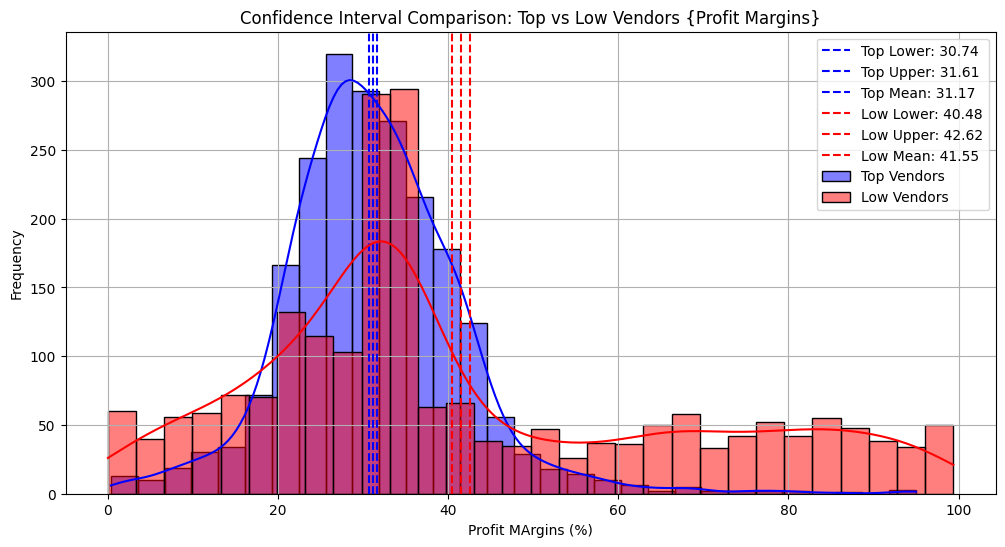

In [76]:
top_mean, top_lower, top_upper = confidence_level(top_vendors)
low_mean, low_lower, low_upper = confidence_level(low_vendors)

print(f"Top Vendors: ({top_lower},{top_upper}), mean: {top_mean}")
print(f"Low Vendors: ({low_lower},{low_upper}), mean: {low_mean}")

plt.figure(figsize=(12,6))

# Top vendors plot
sns.histplot(top_vendors, kde=True, color='blue', bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color='blue', linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color='blue', linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color='blue', linestyle="--", label=f"Top Mean: {top_mean:.2f}")


# Low vendors plot
sns.histplot(low_vendors, kde=True, color='red', bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color='red', linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color='red', linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color='red', linestyle="--", label=f"Low Mean: {low_mean:.2f}")


plt.title("Confidence Interval Comparison: Top vs Low Vendors {Profit Margins}")
plt.xlabel("Profit MArgins (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.plot()

<b>8. Is there a significant difference in profit margins between top-performing and low-performing vendors?</b>

Hypothesis:

H0(Null Hypothesis) --> There is no significant difference in the mean profit margins of top-performing and low-performing vendors.

H1(Alternative Hypothesis) --> The mean profit margins of top-performing and low-performing vendors are significantly different

In [77]:
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

print(f"T-Statistic: {t_stat: .4f}, P-Value: {p_value:.4f}")
if p_value<0.05:
    print("Reject H0: There is a significant diff in profit margins between top and low performing vendors")
else:
    print("Fail to reject H0: No significant difference in profit margins")

T-Statistic: -17.6440, P-Value: 0.0000
Reject H0: There is a significant diff in profit margins between top and low performing vendors


In [ ]:
|